# Challenge Set 2
Topic:        Pandas  
Date:         7/17/16  
Name:         Kevin Cole  
Worked with:  N/A

In [127]:
import pandas as pd
%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [90]:
movies = pd.read_csv('~/ds/metis/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

## Challenge 1

In [91]:
movies.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00


In [92]:
movies.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

In [93]:
movies.ReleaseDate = pd.to_datetime(movies.ReleaseDate)

In [94]:
movies.ReleaseDate = movies.ReleaseDate.dt.date

In [95]:
movies = movies.sort_values('ReleaseDate')

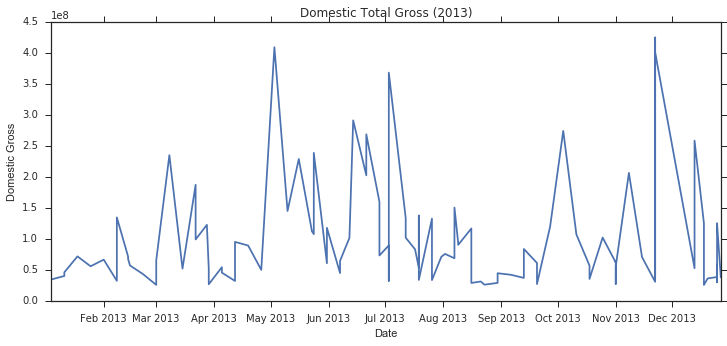

In [96]:
plt.figure(figsize=(12,5))
x = movies.ReleaseDate
y = movies.DomesticTotalGross

plt.plot(x,y,)
plt.ylabel('Domestic Gross')
plt.xlabel('Date')
plt.title('Domestic Total Gross (2013)')

## Challenge 2

In [97]:
movies.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11


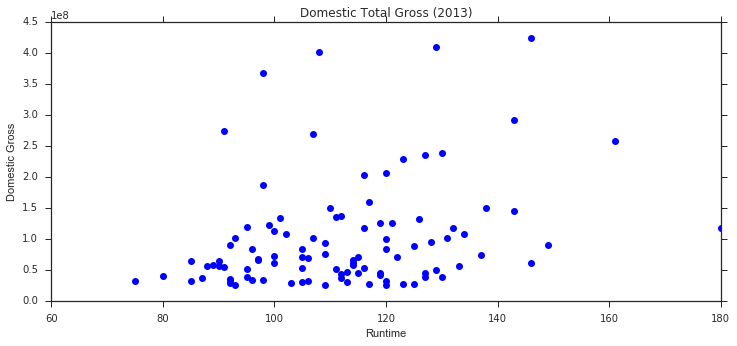

In [98]:
plt.figure(figsize=(12,5))
x = movies.Runtime
y = movies.DomesticTotalGross

plt.plot(x,y, 'bo')
plt.ylabel('Domestic Gross')
plt.xlabel('Runtime')
plt.title('Domestic Total Gross (2013)')

In [99]:
rating = movies.groupby(movies.Rating).mean()

In [100]:
rating.head()

,Budget,DomesticTotalGross,Runtime
Rating,,,
G,NaN,2.684928e+08,107.000000
PG,9.393333e+07,1.311357e+08,99.933333
PG-13,9.660976e+07,1.114498e+08,117.510638
R,3.886364e+07,6.989243e+07,110.729730


## Challenge 4

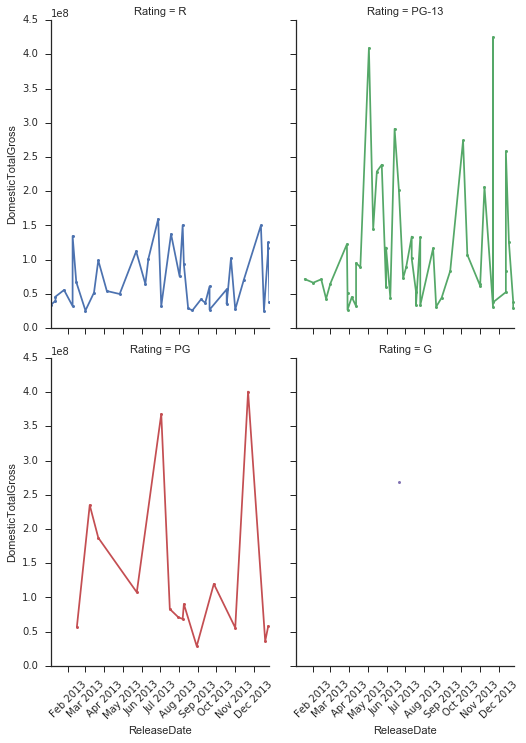

In [101]:
sns.set(style="ticks")

grid = sns.FacetGrid(movies, col='Rating', hue="Rating", size=5.0, col_wrap=2, 
                     aspect=0.75, sharey=True, despine=True)

grid.map(plt.plot, 'ReleaseDate', 'DomesticTotalGross', marker='o', 
         ms=3, ls='-')

for ax in grid.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)

## Challenge 5

In [102]:
director = movies.groupby('Director').mean()

In [103]:
director.head(2)

,Budget,DomesticTotalGross,Runtime
Director,,,
Adam McKay,50000000.0,125168368.0,119.0
Alan Taylor,170000000.0,206362140.0,120.0


In [104]:
director = director.reset_index()
director = director.sort_values('DomesticTotalGross', ascending = False)
director.head(1)

,Director,Budget,DomesticTotalGross,Runtime
27,Francis Lawrence,130000000.0,424668047.0,146.0


## Challenge 6

In [113]:
movies['month'] = [int(x.strftime("%m")) for x in movies.ReleaseDate]

In [115]:
movies.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,month
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04,1
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11,1


In [116]:
month = movies.groupby('month').mean()

In [122]:
month = month.reset_index()
month = month.sort_values('month')

In [123]:
month.head(2)

,index,month,Budget,DomesticTotalGross,Runtime
11,0,1,31875000.0,4.954324e+07,94.600000
10,1,2,46000000.0,6.738601e+07,103.857143


([<matplotlib.axis.XTick at 0x11de00828>,
 <a list of 12 Text xticklabel objects>)

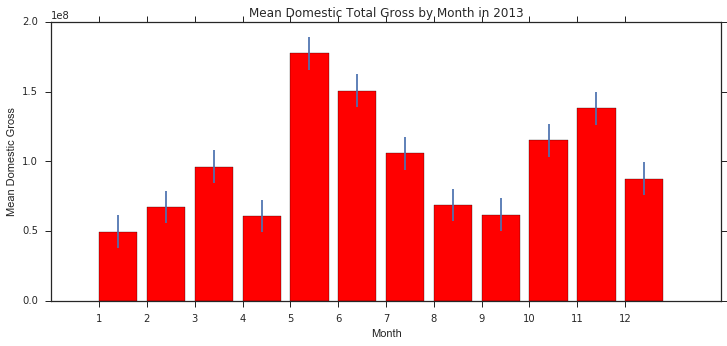

In [149]:
from scipy import stats

plt.figure(figsize=(12,5))

x = month.month
y = month.DomesticTotalGross
serr = stats.sem(y)

plt.bar(x,y, color='red', yerr = serr)
plt.ylabel('Mean Domestic Gross')
plt.xlabel('Month')
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.xticks(np.arange(min(x), max(x) + 1, 1))